# Pymaceuticals Inc.
---

### Analysis

- The correlation between the weight of the mouse and size of the tumor volume seems positive in the analysis. 
    Heavy mice are likely to have a higher tumor volume with Capumulin

- A high percentage of the mices were treatec with Capomulin and Ramicane, does that make them a more effective regime?

- Infubinol is the only drug that have an outlier in the analysis.

- There is a close to an equal divide between male and female test subjects

 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how= "left", )

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice.
mice_data= complete_data["Mouse ID"].unique()
total_mice= len(mice_data)
total_mice

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_dupe= complete_data[complete_data[["Mouse ID", "Timepoint"]].duplicated() ==True]
mice_dupe_id= mice_dupe["Mouse ID"].unique()
mice_dupe_id

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID.
complete_data.loc[complete_data["Mouse ID"] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
#clean_df["Mouse ID"].duplicated().sum()
#clean_df["Mouse ID"].isna().sum()

In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_data.drop(complete_data[complete_data['Mouse ID'] == 'g989'].index)
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.
#clean_mice_df= clean_df["Mouse ID"].nunique()
clean_mice_df= clean_df["Mouse ID"].unique()
len(clean_mice_df)

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
#drug_reg_data= clean_df.set_index(["Drug Regimen"])
summary_df = clean_df.groupby("Drug Regimen")
mean_tumor = summary_df["Tumor Volume (mm3)"].mean()
median_tumor = summary_df["Tumor Volume (mm3)"].median()
variance_tumor = summary_df["Tumor Volume (mm3)"].var()
stdev_tumor = summary_df["Tumor Volume (mm3)"].std()
#sem_tumor = summary_df["Tumor Volume (mm3)"].sem()
sem_tumor = summary_df['Tumor Volume (mm3)'].apply(sem, nan_policy='omit')

summary_groupby_df = pd.DataFrame({'Mean Tumor Volume':mean_tumor, 'Median Tumor Volume': median_tumor,
                                   'Tumor Volume Variance': variance_tumor,
                                   'Tumor Volume Std. Dev': stdev_tumor, 'Tumor Volume Std. Err': sem_tumor})
summary_groupby_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_method_df= clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
agg_drug_method_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

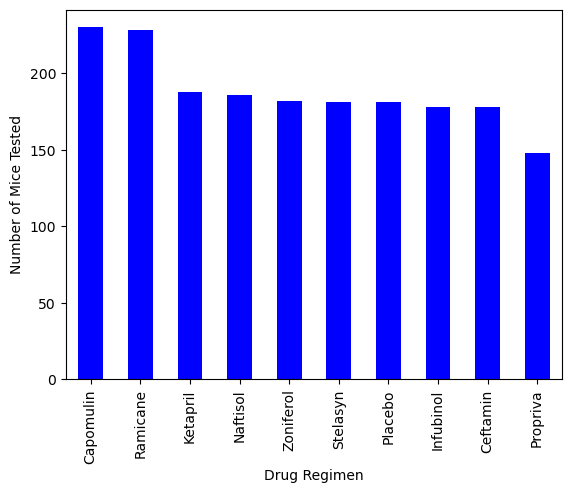

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drug_data= clean_df[["Drug Regimen","Timepoint"]]

#count per drug
mice_per_drug = mice_drug_data["Drug Regimen"].value_counts()
mice_per_drug

#Datafarame.plot() to create a bar chart of data
mice_per_drug.plot(kind= "bar",color= "b",
                   xlabel= "Drug Regimen",
                   ylabel= "Number of Mice Tested")
plt.show()

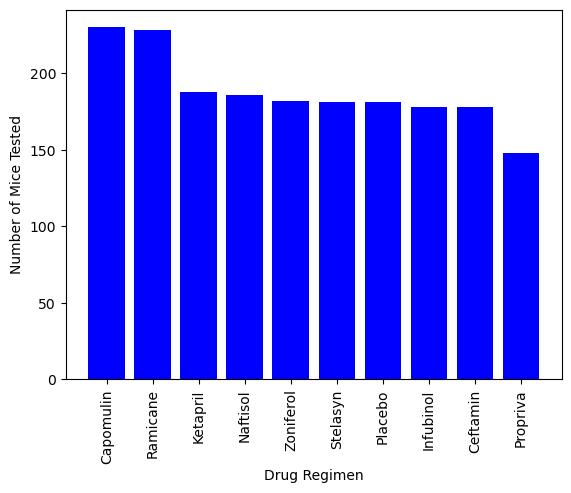

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs= mice_per_drug.index.values
count= mice_per_drug.values

#graph build
plt.bar(drugs, count, color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

In [29]:
#check the type of the data
type(clean_df)

pandas.core.frame.DataFrame

In [32]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


<Axes: ylabel='count'>

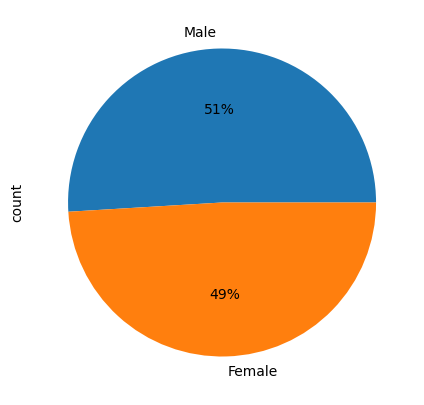

In [30]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_df= clean_df[clean_df["Mouse ID"].isin(clean_mice_df)].drop_duplicates(subset="Mouse ID")

gender_data= clean_df['Sex'].value_counts()
#count= ["Male", "Female"]
# Make the pie chart
gender_data.plot(kind= "pie", autopct= "%1.0f%%", color= "blue", figsize= (7, 5))

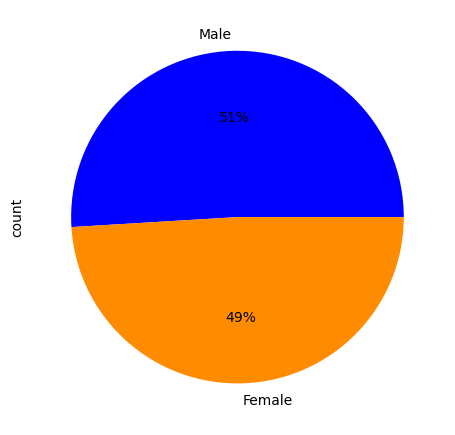

In [78]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.figure(figsize=(7.4,5.4))
plt.pie(gender_data, labels=gender_data.index, autopct= "%1.0f%%", colors=['blue', 'darkorange'])
# Make the pie chart
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_group_df = pd.merge(clean_df, grouped_max_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
max_group_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = max_group_df[max_group_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']    

    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # add subset
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} Potential Outliers: {outliers}")


Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


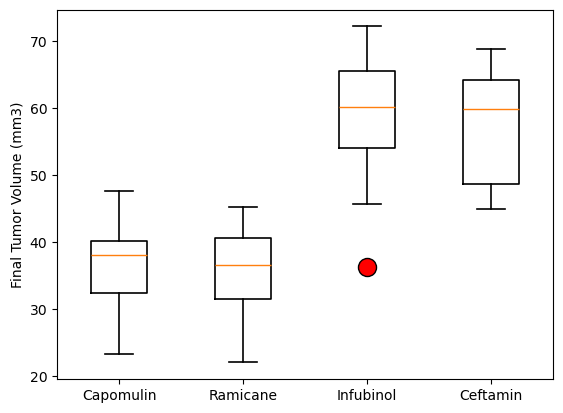

In [88]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=treatments, 
            flierprops=dict(markerfacecolor='red', marker='o', markersize=13),
            boxprops=dict(linewidth=1.2),
            whiskerprops=dict(linewidth=1.2),
            capprops=dict(linewidth=1.2),
            meanprops=dict(linewidth=1.2))
plt.show()

## Line and Scatter Plots

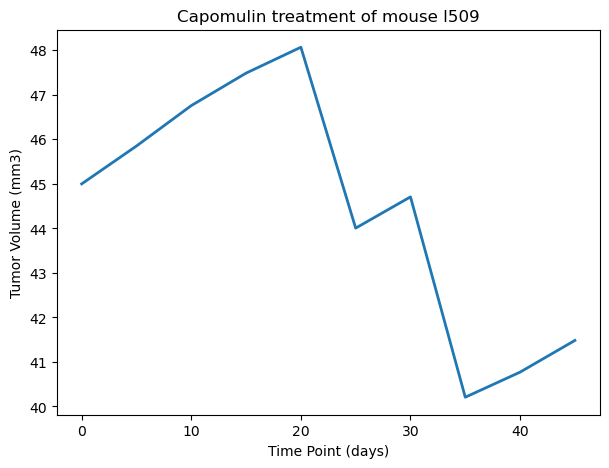

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter for Capomulin only
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Start plotting and customizing
plt.figure(figsize= (7, 5))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], linewidth=2)

# Add title and labels
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

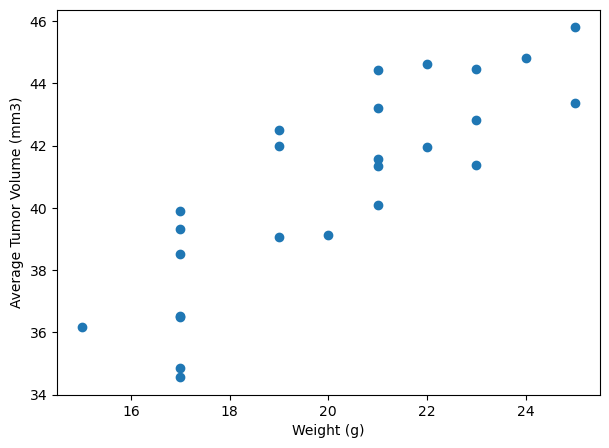

In [90]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volumes = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a DataFrame with the average tumor volume and mouse weight
capomulin_avg_tumor_data = pd.DataFrame({
    'Weight (g)': mouse_weights,
    'Average Tumor Volume (mm3)': avg_tumor_volumes
})

# Generate a scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(capomulin_avg_tumor_data['Weight (g)'], capomulin_avg_tumor_data['Average Tumor Volume (mm3)'])

# Add x and y labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()

## Correlation and Regression

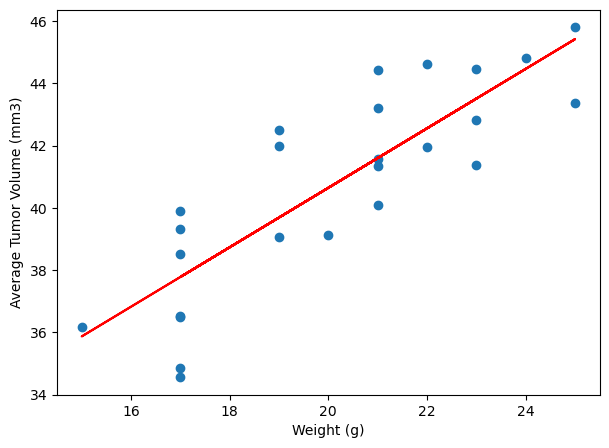

In [91]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Use linregress to find slope, intercept, r_value, p_value, std_err
slope, intercept, r_value, p_value, std_err = st.linregress(
    capomulin_avg_tumor_data['Weight (g)'],
    capomulin_avg_tumor_data['Average Tumor Volume (mm3)']
)

# Generate a scatter plot with the linear regression line
plt.figure(figsize=(7, 5))
plt.scatter(capomulin_avg_tumor_data['Weight (g)'], capomulin_avg_tumor_data['Average Tumor Volume (mm3)'])
plt.plot(capomulin_avg_tumor_data['Weight (g)'], 
            slope * capomulin_avg_tumor_data['Weight (g)'] + intercept, 
            color='red')

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()